# CSCA 5622 Supervised Learning Final Project

## Problem to Solve: Heart Attack Prediction
This project analyzes and applies various supervised learning methods on hear attack dataset which was downloaded from the internet to solve problems and answers questions or simply help us understand more about what conditions can lead to hear attacks. There are factors that affect heart attack chance more than others. Understanding and knowing more about and their relationships can help us prevent hear attack diseases. 

## Data Source
The data was downloaded from the internet.

Data includes: Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk


## Supervised Learning Methods Used
Logistic Regression: This method is used for showing us how true positive and false positive cases layouts in the datasets. It helps us understand more about binary classification tasks. 

Decision Trees: Decision trees are useful for understanding how various features in the data influence the outcome (high or low risk of heart attack).

Random Forest: Random Forests are less likely to overfit than a single decision tree and provide importance scores for each feature, which can help in understanding which factors are most influential in predicting heart attack risk.

Gradient Boosting Machines (GBM): This method is used to show us what factors can increase chance of getting heart attacks. How the factors are weighed and their importances in this heart attack research.

Support Vector Machines (SVM): This method help us find the best boundary line that separates the data into two classes. It also shows supports and dataset that is relevant to the boundary.


# Table of Contents:
1. Import depencies or libraries that need to be used in this project
2. EDA step. Read the data from CVS file and Clean up data or reformat data for the purposes of the project
3. EDA step. Display plots for the input data
4. Apply Logistic Regression and display plots
5. Apply Decision Trees and display plots
6. Apply Random Forest and display plots
7. Apply Gradient Boosting Machines (GBM) and display plots
8. Apply Support Vector Machines (SVM) and display plots
9. Conclusions

### 1. Import depencies or libraries that need to be used in this project


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

DEBUG_VERBOSE = False

### 2. EDA step. Read the data from CVS file and Clean up data or reformat data for the purposes of the project

In [2]:
# Read data from CSV file
data = pd.read_csv('heart_attack_prediction_dataset_trimmed.csv')
if DEBUG_VERBOSE:
    print(data.head())

# Clean up data
data.fillna(method='ffill', inplace=True)
lab_encode = LabelEncoder()
cols = data.select_dtypes(include=['object']).columns
for col in cols:
    data[col] = lab_encode.fit_transform(data[col])

# Get features and target
X = data.drop(['Heart Attack Risk', 'Patient ID'], axis=1)
y = data['Heart Attack Risk']

# Get training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
        
        

### 3. EDA step. Display plots for the input data

A. Histogram Plots

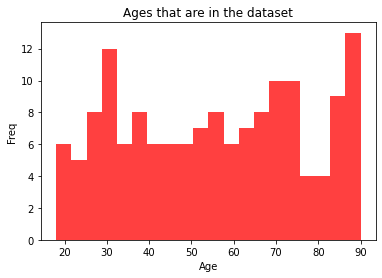

In [3]:
plt.hist(data['Age'], bins=20, color='red', alpha=0.75)
plt.title('Ages that are in the dataset')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()
    

Discussions: This histogram shows the dataset contains good data because it covers most ages and the height of each bar is about as the same as the others meaning the data is well diversified. The participants in the datasets contain enough data for each age.

B. Heat Map

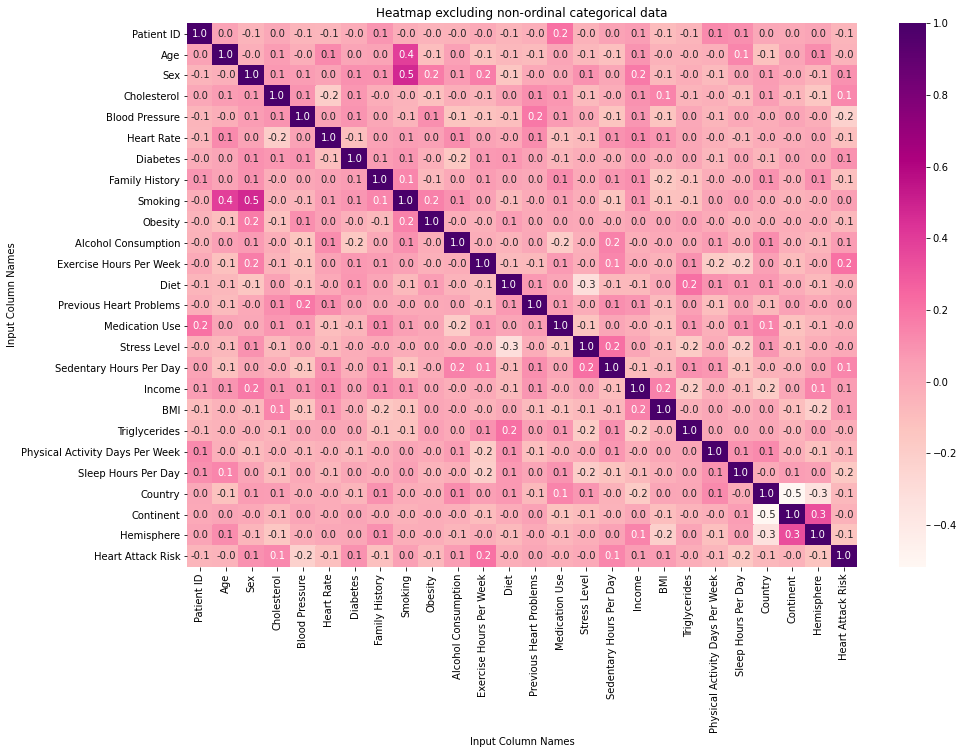

In [4]:

correlation_matrix = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='RdPu', cbar=True)
plt.title('Heatmap excluding non-ordinal categorical data')
plt.xlabel('Input Column Names')
plt.ylabel('Input Column Names')
plt.show()

Discussions: The heatmap plot shows that age, sex and smoking have positive correlations meaning if they are strongly bonded and they are related to each others. Continent and hemisphire also have positive correlations. 

### 4. Apply Logistic Regression and Display Plots

#### A. Compute Logistic Regression

In [5]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

# calculate y prediction
y_pred = log_reg.predict(X_test)

# accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

# Calculate confusion matrix
confusion_matrix_logis = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_logis)

Accuracy:  0.7
Confusion Matrix:
[[16  4]
 [ 5  5]]


#### B. Display plots

roc_value is  0.63


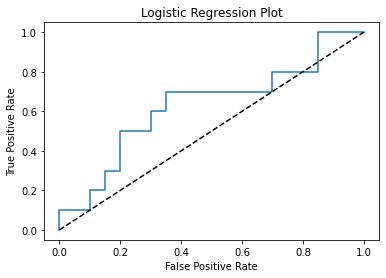

In [6]:
# Calculate ROC
y_pred = log_reg.predict_proba(X_test_scaled)[:, 1]
roc_value = roc_auc_score(y_test, y_pred)
print("roc_value is ", roc_value)

# Generate ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_pred)

# display 
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Plot')
plt.show()

Discussions: The logistic regression method is applied on the dataset; however, it doesn't seem to differenciate between true positive vs false positive cases. The ROC value is 0.63 which is not good, but the accuracy is 0.7 which is a good sign. In conclusion, this method doesn't help us much for this type of dataset although it's still good to apply the method on the dataset to see what it can do so we can compare it to other methods.

### 5.Apply Decision Tree and Display Plots

#### A. Compute Decision Tree 

In [7]:
# init decision tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# calculate relevant values
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_decision_tree)


Accuracy:  0.7
Confusion Matrix:
[[15  5]
 [ 4  6]]


#### B. Display Decision Tree Plots

roc_value is  0.675


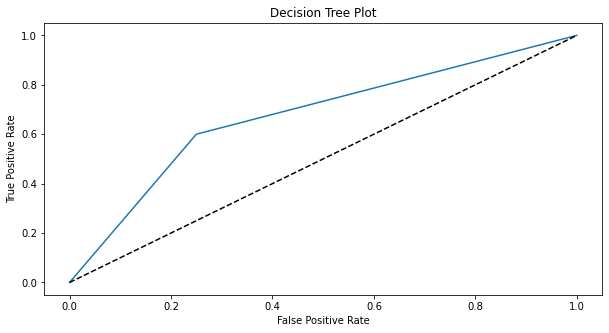

In [8]:
# Calculate ROC
y_pred_dc = decision_tree.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, y_pred_dc)
print("roc_value is ", roc_value)

# Generate ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_pred_dc)

# display
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Plot')
plt.show()

Discussions: Decision Tree yield a ROC value of 0.675 which is slightly better than Logistic Regression method. We also see that Accuracy jumped to 0.7 with this method. However, it's still not good enough. In conclusion, this method doesn't help us much for this type of dataset although it's still good to apply the method on the dataset to see what it can do so we can compare it to other methods.

### 6. Apply Random Forest and Display Plots


In [9]:
#### A. Compute Random Forest

In [10]:
# init
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
confusion_matrix_ran_forest = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_ran_forest)



Accuracy:  0.6666666666666666
Confusion Matrix:
[[19  1]
 [ 9  1]]


In [11]:
#### B. Display plots

roc_value is  0.56


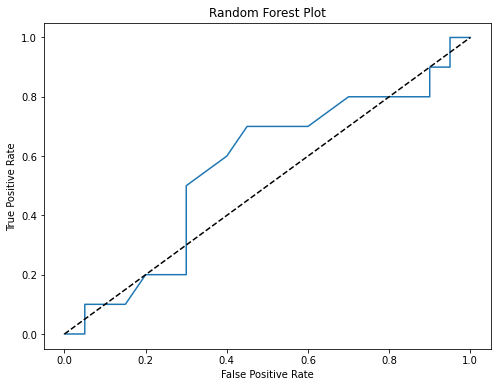

 feature  10 importance  0.09013126236260645
 feature  2 importance  0.08233104679151722
 feature  0 importance  0.07809312987730929
 feature  16 importance  0.07499904465459833
 feature  3 importance  0.07451813254602933
 feature  15 importance  0.07341332303736432
 feature  18 importance  0.06298147024174384
 feature  4 importance  0.062063306300385895
 feature  21 importance  0.06134679838821312
 feature  17 importance  0.059930447171595964
 feature  14 importance  0.04541496914270571
 feature  19 importance  0.040640227225755096
 feature  20 importance  0.0349957627639345
 feature  6 importance  0.02249690528868119
 feature  11 importance  0.021004678740432277
 feature  22 importance  0.020533633340477947
 feature  23 importance  0.016918773181120592
 feature  9 importance  0.015369286286875755
 feature  1 importance  0.014142149338765073
 feature  5 importance  0.01226943444539615
 feature  13 importance  0.01170056320645209
 feature  8 importance  0.011304947663984499
 feature  1

In [12]:
# Calculate ROC
y_pred_random_forest = random_forest.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, y_pred_random_forest)
print("roc_value is ", roc_value)

# Generating ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_pred_random_forest)

# display
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Plot')
plt.show()

# Feature Importance
feature_importances_ = random_forest.feature_importances_
indices = np.argsort(feature_importances_)[::-1]

for feature in range(X.shape[1]):
    print(" feature ", indices[feature], "importance ", feature_importances_[indices[feature]]) 

Discussions:  Random Forest yields a ROC value of 0.56 which is slightly worse than Logistic Regression and Decision Tree methods. We also see that Accuracy jumped down to 0.6666666666666666 with this method. However, it's still not good enough. In conclusion, this method doesn't help us much for this type of dataset although it's still good to apply the method on the dataset to see what it can do so we can compare it to other methods.

### 7. Apply Gradient Boosting Machines(GBM) and Display Plots


#### A. Compute GBM

In [13]:
# Init
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
confusion_matrix_gbm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_gbm)

Accuracy:  0.6333333333333333
Confusion Matrix:
[[17  3]
 [ 8  2]]


#### B. Display Plots

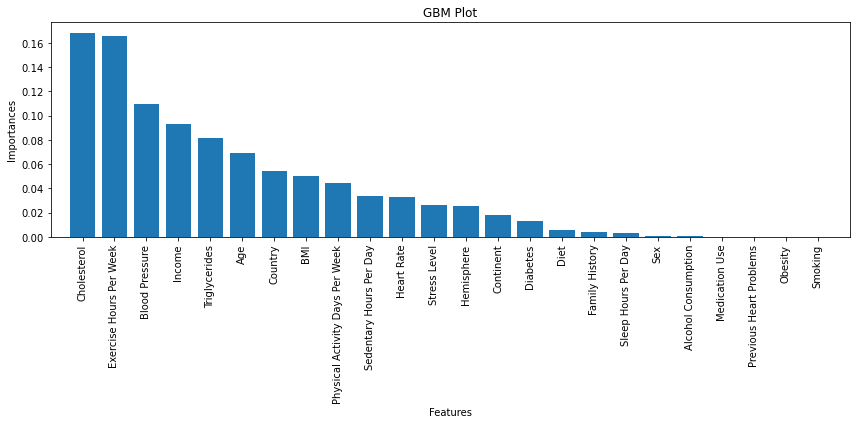

In [14]:
important_features = gbm.feature_importances_
sorted_idx = np.argsort(important_features)[::-1]
labels = X.columns[sorted_idx]

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), important_features[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.title('GBM Plot')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.tight_layout()
plt.show()

Dicussions: This is definitely a good GBM plot that shows us how important these factors are and what contribute to heart attacks the most. It's interesting to see Cholesterol and Exersice hours per week along with other factors contribute the most to heart attack rate. It's also good to note that although smoking has high correlation with age but it doesnt contribute to heart attack. 

### 8. Apply SVM and Display Plots


#### A. Compute SVM

In [15]:
# Create an SVM model
model = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf', C=1, gamma='auto'))
# Train the model
model.fit(X_train, y_train)
# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy: ", accuracy)
confusion_matrix_svc = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_svc)

Accuracy:  0.6666666666666666
Confusion Matrix:
[[17  3]
 [ 8  2]]


#### B. Display Plots

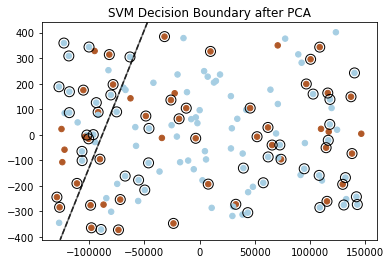

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

classifier = svm.SVC(kernel='linear', C=100)
classifier.fit(X_pca, y)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.title('SVM Plot')
plt.show()

Discussions: In this SVM plot, there is a decision boundary line to separate 2 classes which is good. There are support vectors which have a circle around them. Some of them are near the boundary line but some of them are way outside. This SVM can be used with other models for the best results and effectivenesses. 

### 9. Conclusions

In conclusion, this is an interesting project to apply various supervised learning methods. Each does different things and can be used in different ways to help us know more about factors that can contribute to heart attacks.It also tells us what factors we need to pay attention or what factors are important in this research. There are various techniques that can be used to explore more about this research. Understanding the limits and what each of these supervised learning methods can do is crucial in this field.